In [1]:
# 預測鐵達尼號乘客存活率
# 載入下載 lib
import urllib.request
import os

In [2]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/titanic/titanic3.xls"
filepath= "C:/Users/tom83615/Downloads/titanic3.xls"
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url, filepath)
    print("Download: ", result)

In [3]:
# 載入分析模組
import numpy as np
import pandas as pd
all_df = pd.read_excel(filepath)

In [4]:
# 查看前 100 組
# http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf
# pclass:   艙等 (1=1st; 2=2nd; 3=3rd)
# survived: 是否生還  (0=否; 1=是)
# name:     姓名
# sex:      性別
# age:      年紀
# sibsp:    手足或配偶在船上數量
# parch:    父母或子女在船上數量
# ticket:   船票號碼
# fare:     船票價格
# cabin:    艙位號碼
# embarked: 登船港口 (C=Cherbourg; Q=Queenstown; S=Southampton)
# boat:     救生艇編號
# body:     大體識別碼
# home.dest:住家地址
all_df[:100]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [5]:
# 僅取所需的資料欄
cols = [
    'survived',
    'pclass',
    'sex',
    'age',
    'sibsp',
    'parch',
    'fare',
    'embarked'
]
all_df = all_df[cols]

In [6]:
# 資料預處理 (null)
all_df.isnull().sum()

survived      0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [7]:
# 年齡 null 預處理 (平均值法)
age_mean = all_df['age'].mean()
all_df['age'] = all_df['age'].fillna(age_mean)

In [8]:
# 船票價格 null 預處理 (平均值法)
fare_mean = all_df['fare'].mean()
all_df['fare'] = all_df['fare'].fillna(fare_mean)

In [9]:
# 登船港口 null 預處裡 (設成 C)
all_df['embarked'] = all_df['embarked'].fillna("C")

In [10]:
# 檢查還有沒有 null
all_df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [11]:
# 性別預處理 (文字轉數字)
all_df['sex'] = all_df['sex'].map({'female':0, 'male':1}).astype('int')

In [12]:
# 登船港口預處理 (文字轉 onehot)
# embarked 會變 3 欄
x_OneHot_df = pd.get_dummies(data=all_df, columns=['embarked'])

In [13]:
# 查看最後結果
x_OneHot_df[:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1
2,0,1,0,2.0000,1,2,151.5500,0,0,1
3,0,1,1,30.0000,1,2,151.5500,0,0,1
4,0,1,0,25.0000,1,2,151.5500,0,0,1
5,1,1,1,48.0000,0,0,26.5500,0,0,1
6,1,1,0,63.0000,1,0,77.9583,0,0,1
7,0,1,1,39.0000,0,0,0.0000,0,0,1
8,1,1,0,53.0000,2,0,51.4792,0,0,1
9,0,1,1,71.0000,0,0,49.5042,1,0,0


In [14]:
# 轉成 ndarray並查看最後結果
ndarray = x_OneHot_df.values
ndarray

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 3., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 1., 0., 0.],
       [0., 3., 1., ..., 0., 0., 1.]])

In [15]:
# 另是否存活當 label，其他當作 features
label       = ndarray[:,0]
features    = ndarray[:,1:]

In [16]:
# 查看 label & features
print(label[:2])
print(features[:2])

[1. 1.]
[[  1.       0.      29.       0.       0.     211.3375   0.       0.
    1.    ]
 [  1.       1.       0.9167   1.       2.     151.55     0.       0.
    1.    ]]


In [17]:
# 標準化參數 (這次直接用預處理模組)
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_features = minmax_scale.fit_transform(features)

In [18]:
# 查看標準化後的 features
print(scaled_features[:2])

[[0.         0.         0.36116884 0.         0.         0.41250333
  0.         0.         1.        ]
 [0.         1.         0.00939458 0.125      0.22222222 0.2958059
  0.         0.         1.        ]]


In [19]:
# 切割訓練與驗證資料 0.8/0.2
msk = np.random.rand(len(scaled_features)) < 0.8
train_features  = scaled_features[msk]
test_features   = scaled_features[~msk]
train_label     = label[msk]
test_label      = label[~msk]
print(
    'total: ', len(scaled_features),
    'train: ', len(train_features),
    'test: ',  len(test_features),
)

total:  1309 train:  1057 test:  252


In [20]:
# 建立 CNN 模型 & 
# 載入其他函式庫
from keras.models import Sequential
from keras.layers import Dense, Dropout
import otherLib as olib
olib.solve_cudnn_error() # 處理 GPU memory 分配
model = Sequential()

1 Physical GPUs, 1 Logical GPUs


In [21]:
# 建立模型輸入層與隱藏層 1
# 隱藏層: 40 
# 輸入層: 9
# 常態分佈亂數: nuiform (處理 bias)
# 啟動函數: 線性
model.add(Dense(
    units = 40,
    input_dim = 9,
    kernel_initializer = "uniform",
    activation = 'relu'
))

In [22]:
# 建立模型隱藏層 2
# 隱藏層: 30 
# 常態分佈亂數: uniform (處理 bias)
# 啟動函數: 線性
model.add(Dense(
    units = 30,
    kernel_initializer = "uniform",
    activation = 'relu'
))

In [23]:
# 建立輸出層
# 輸出層: 1
# 常態分佈亂數: uniform (處理 bias)
# 啟動函數: S型函數
model.add(Dense(
    units = 1,
    kernel_initializer = 'uniform',
    activation = 'sigmoid'
))

In [24]:
# 顯示剛建立之模型
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# 定義訓練方法
# 損失函數: 二元交叉熵
# 最佳化方法: adam
# 最佳化依據: 準確率
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = 'accuracy'
)

In [26]:
# 開始訓練
# x,y: 輸入值
# 拆分: 0.1 資料作驗證； 0.9做訓練
# 訓練: 30 次
# 每批次: 30 筆資料
train_history = model.fit(
    x = train_features,
    y = train_label,
    validation_split = 0.1,
    epochs = 30,
    batch_size = 30
)

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.5920 - val_loss: 0.6612 - val_accuracy: 0.8019
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6036 - val_loss: 0.5708 - val_accuracy: 0.8019
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.6845 - val_loss: 0.4989 - val_accuracy: 0.8113
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7634 - val_loss: 0.5211 - val_accuracy: 0.7736
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7813 - val_loss: 0.4708 - val_accuracy: 0.7547
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7676 - val_loss: 0.4827 - val_accuracy: 0.7547
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7771 - val_loss: 0.4897 - val_accuracy: 0.7736
Epoch 8/30
32/32 [==

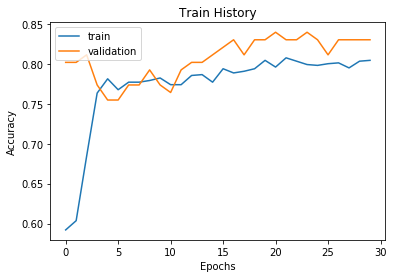

In [27]:
# 畫圖 
olib.show_train_history(train_history)

In [28]:
# 預測準確度
scores = model.evaluate(test_features, test_label)
print('accuracy=', scores[1])

8/8 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7659
accuracy= 0.7658730149269104


In [29]:
# 拿電影中 Jack 與 Rose 並虛構資料看結果
# Jack: 3 等艙, male(0), $5, 23 歲, Southampton 上船, 無其他同行者
# Rose: 頭等艙, female(1), $100, 20 歲, Southampton 上船, 無其他同行者
Jack = pd.Series([0, 3, 1, 23, 0, 0, 5.0, 'S'])
Rose = pd.Series([1, 1, 0, 20, 0, 0, 100.0, 'S'])
JR_df = pd.DataFrame(
    [list(Jack), list(Rose)],
    columns=[
        'survived',
        'pclass',
        'sex',
        'age',
        'sibsp',
        'parch',
        'fare',
        'embarked'
    ])
JR_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,23,0,0,5.0,S
1,1,1,0,20,0,0,100.0,S


In [30]:
# 加入 all_df 並預處裡
new_df = pd.concat([all_df, JR_df])
new_OneHot_df = pd.get_dummies(data=new_df, columns=['embarked'])
new_OneHot_df[-2:] #只看最後兩筆即可

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,1,23.0,0,0,5.0,0,0,1
1,1,1,0,20.0,0,0,100.0,0,0,1


In [31]:
# 標準化參數並取出最後兩筆
new_ndarray = new_OneHot_df.values
new_features = new_ndarray[:,1:]
new_scaled_features = minmax_scale.fit_transform(new_features)
JR_scaled_features = new_scaled_features[-2:]
JR_scaled_features

array([[1.        , 1.        , 0.28601223, 0.        , 0.        ,
        0.00975935, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.24843392, 0.        , 0.        ,
        0.195187  , 0.        , 0.        , 1.        ]])

In [32]:
# 預測兩人存活機率
# Jack 好慘...
JR_probability = model.predict(JR_scaled_features)
JR_probability

array([[0.13738497],
       [0.97690445]], dtype=float32)

In [33]:
# 加入算好的存活率至原始資料
all_probability = model.predict(scaled_features)
all_df.insert(len(all_df.columns), 'probability', all_probability)
all_df[:10]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,1,0,29.0000,0,0,211.3375,S,0.977798
1,1,1,1,0.9167,1,2,151.5500,S,0.698783
2,0,1,0,2.0000,1,2,151.5500,S,0.983986
3,0,1,1,30.0000,1,2,151.5500,S,0.440993
4,0,1,0,25.0000,1,2,151.5500,S,0.978430
5,1,1,1,48.0000,0,0,26.5500,S,0.233393
6,1,1,0,63.0000,1,0,77.9583,S,0.902440
7,0,1,1,39.0000,0,0,0.0000,S,0.292012
8,1,1,0,53.0000,2,0,51.4792,S,0.911502
9,0,1,1,71.0000,0,0,49.5042,C,0.197929


In [34]:
# 檢視非洲人(高存活率但掛了)
all_df[(all_df['survived'] == 0) & (all_df['probability'] > 0.95)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,1,0,2.0,1,2,151.5500,S,0.983986
4,0,1,0,25.0,1,2,151.5500,S,0.978430
105,0,1,0,36.0,0,0,31.6792,C,0.982765
169,0,1,0,50.0,0,0,28.7125,C,0.977770


In [37]:
# 檢視歐洲人(低存活率但生還)
all_df[(all_df['survived'] == 1) & (all_df['probability'] < 0.1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,probability
742,1,3,1,45.000000,0,0,8.050,S,0.093472
1003,1,3,1,29.881135,2,0,23.250,Q,0.093883
1233,1,3,1,44.000000,0,0,7.925,S,0.095159
